# Unsupervised learning 

Unsupervised learning is a type of machine learning where the model learns patterns from input data without explicit feedback or labeled responses. In unsupervised learning, the goal is to find hidden structure or relationships in the input data. This is in contrast to supervised learning, where the model learns from labeled data with a known output.

In unsupervised learning, the model tries to infer the natural structure present within a set of data samples. Common tasks in unsupervised learning include clustering, dimensionality reduction(PCA), etc. 

We will consider a Customer Segmentation example using the dataset Mall Customer Segmentation Data on Kaggle. <br>
Data link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### KMean Clustering

The core concept of clustering is quite simple. Essentially, it involves recognizing groups within a set of points. We might think, "I have these points, and they seem to form clusters. It would be useful to define these clusters more precisely and, when a new point is introduced, assign it to the appropriate cluster." This concept promotes experimentation and offers a range of clustering algorithms to explore.

##### KMeans general process:

K-means algorithm is the most popular and yet simplest of all the clustering algorithms. Here is how it works:
1. Select the number of clusters $k$ that you think is the optimal number.
2. Initialize $k$ points as "centroids" randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations. 
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).

This algorithm is easy to describe and visualize. Let's take a look.

[1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1.]


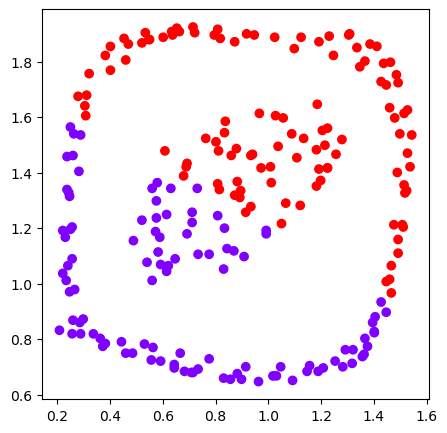

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# K-means clustering
def kmeans_clustering(X, k, seed, max_iters = 200):
    n, d = X.shape
    np.random.seed(seed)
    centers = X[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for _ in range(max_iters):
        # Assign each data point to the nearest center
        for i in range(n):
            distances = [euclidean_distance(X[i], center) for center in centers]
            labels[i] = np.argmin(distances)
        
        # Update centers
        for j in range(k):
            centers[j] = np.mean(X[labels == j], axis=0)
    
    return labels, centers

def loadDataSet():
    a = []
    f = open("../../data/B.txt",'r')
    lines = f.readlines()   #make lines a list, has index inside already
    f.close()
    for line in lines:
        b = ['', '']
        b[0],b[1] = line.split()
        a.append(b)
    dataSet = np.array(a, dtype=float)   
    return dataSet

X = loadDataSet()

# Fit KMeans
label_pred, centroid = kmeans_clustering(X, k = 2, seed = 2024)

print(label_pred)

plt.figure(figsize = (5, 5))  
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:, 0], X[:, 1], c = label_pred, cmap ='rainbow')
plt.show()

## Choosing the number of clusters for K-means

In contrast to the supervised learning tasks such as classification and regression, clustering requires more effort to choose the optimization criterion. Usually, when working with k-means, we optimize the sum of squared distances between the observations and their centroids.

$$\Large J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

where $C$ – is a set of clusters with power $K$, $\mu_k$ is a centroid of a cluster $C_k$.

This definition seems reasonable -- we want our observations to be as close to their centroids as possible. But, there is a problem -- the optimum is reached when the number of centroids is equal to the number of observations, so you would end up with every single observation as its own separate cluster.

In order to avoid that case, we should choose a number of clusters after which a function $J(C_k)$ is decreasing less rapidly. More formally,
$$\Large D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

Let's look at an example.

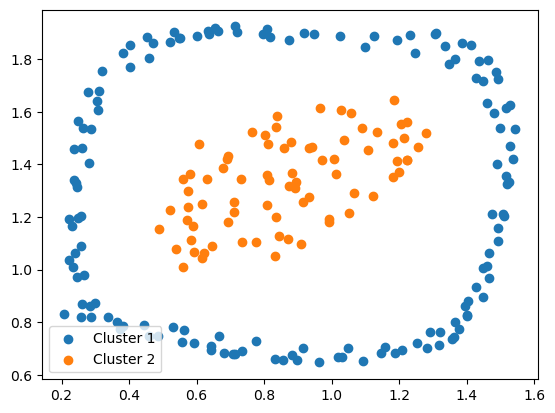

In [3]:
# Perform agglomerative clustering
def agglomerative_clustering(X, k):
    n = X.shape[0]
    clusters = [[i] for i in range(n)]
    
    while len(clusters) > k:
        min_dist = np.inf
        merge_indices = None
        
        # Find closest clusters to merge
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]
                
                # Calculate distance between clusters (single-linkage)
                dist = np.min([euclidean_distance(X[p1], X[p2]) for p1 in cluster1 for p2 in cluster2])
                
                if dist < min_dist:
                    min_dist = dist
                    merge_indices = (i, j)
        
        # Merge closest clusters
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
    
    return clusters

# Run agglomerative clustering
k = 2  # Number of clusters
clusters = agglomerative_clustering(X, k)

# Plot clusters
for i, cluster in enumerate(clusters):
    points = X[cluster]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

plt.legend()
plt.show()